In [1]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sklearn cleaning/testing
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score

#sklearn models
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv',index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

In [3]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [4]:
#shorten column names
column_names = ['mLastDon','nDon','volDon','mFirstDon','target']
train.columns = column_names

#set target to nan
test['target'] = np.nan
test.columns = column_names

In [5]:
trainTest = pd.concat([train, test])

In [6]:
#EDA set up
plt.rcParams['figure.figsize']=(15,6)
plt.style.use('seaborn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E60F90320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028E61298B70>]], dtype=object)

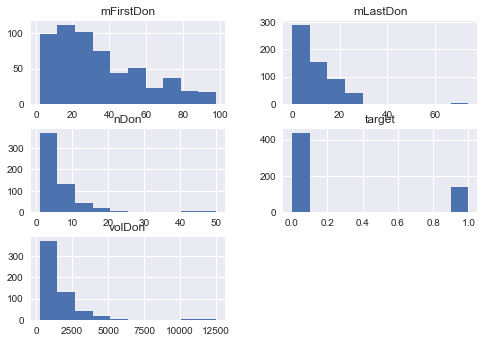

In [7]:
train.hist()

C:\Users\jbonanno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\jbonanno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


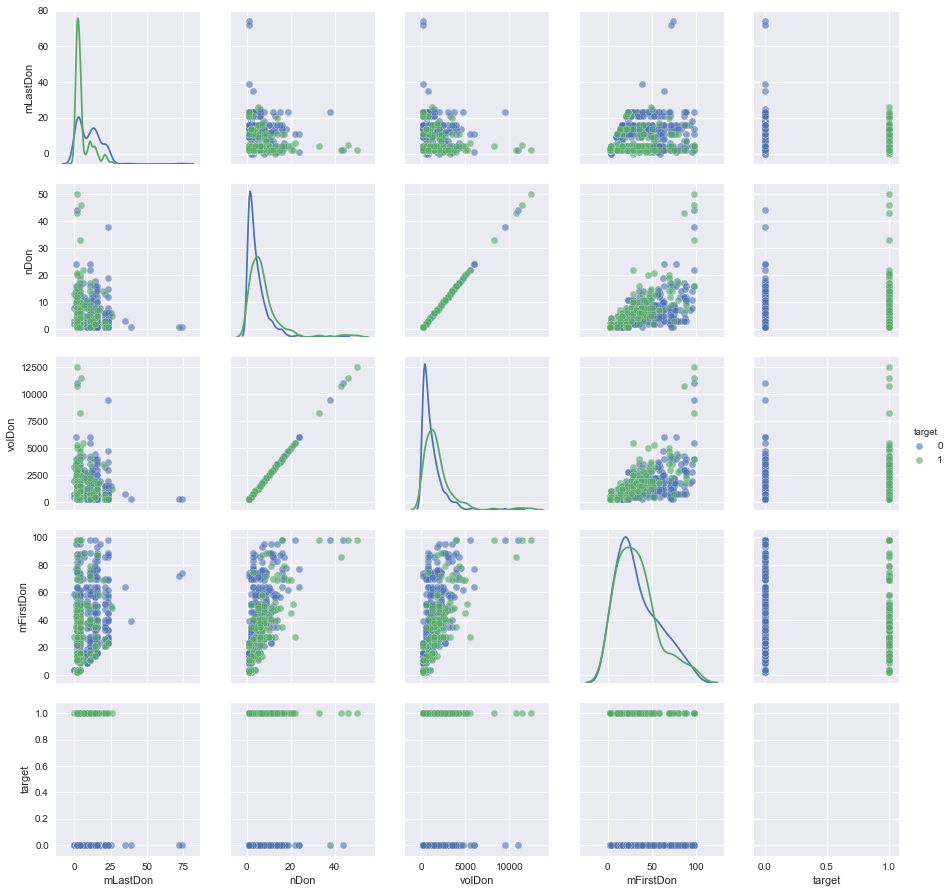

In [8]:
sns.pairplot(train, 
             hue = 'target',
            diag_kind = 'kde',
            plot_kws = {'alpha': 0.6})

In [9]:
#feature engineering

In [10]:
#if haven't donated in a while, unlikely to do so again
#train[train.mLastDon>27]
#train['mLastDon27plus'] = np.where(train['mLastDon']>=50, 1, 0)
#trainTest['mLastDon27plus'] = np.where(trainTest['mLastDon']>=50, 1, 0)

#not effective feature engineering remove

In [11]:
#largeDonNum
#train[train.nDon >30]

#train['largeDonNum'] = np.where(train['nDon']>=30, 1, 0)
#trainTest['largeDonNum'] = np.where(trainTest['nDon']>=30, 1, 0)

#not effective feature engineering remove

In [12]:
#calculates minimum age - 17 youngest eligible to donate blood + months since first donation/12
train['minAge'] = ((train.mFirstDon/12)+17)
trainTest['minAge'] = ((trainTest.mFirstDon/12)+17)

#looking at output, not how helpful/accurage it is
#min age is 17 and oldest is 25?  

In [13]:
train.describe()

,mLastDon,nDon,volDon,mFirstDon,target,minAge
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583,19.837529
std,8.175454,5.740010,1435.002556,24.227672,0.427200,2.018973
min,0.000000,1.000000,250.000000,2.000000,0.000000,17.166667
25%,2.000000,2.000000,500.000000,16.000000,0.000000,18.333333
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,19.333333
75%,14.000000,7.000000,1750.000000,49.250000,0.000000,21.104167
max,74.000000,50.000000,12500.000000,98.000000,1.000000,25.166667


In [14]:
#ratio of nDon to mLastDon

In [15]:
train.mLastDon.value_counts()

2     140
4     115
14     60
11     60
16     48
21     37
23     36
9      17
3      10
1       9
7       5
8       5
12      5
13      4
6       4
0       4
10      3
18      2
5       2
72      1
15      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
74      1
Name: mLastDon, dtype: int64

In [16]:
train['target'].value_counts(normalize = True)

0    0.760417
1    0.239583
Name: target, dtype: float64

In [17]:
#months since last donation if number is even vs. number is odd
#maybe they run blood drives on a every 6 or 12 month basis
#train.groupby('mLastDon')['target'].value_counts(normalize=True).unstack()
#list = [2,4]
#hypothesis, if donated in last 2,4 months, more likely than average to donate again

In [18]:
#train['donRecent'] = np.where(train['mLastDon'].isin([2,4]), 1, 0)
#trainTest['donRecent'] = np.where(trainTest['mLastDon'].isin([2,4]), 1, 0)
#not effective - remove

In [19]:
#mLastDonation/Number of Donations 
#lower your number, maybe more likely to donate soon?
train['mLastDon_nDon_ratio'] = (train.mLastDon/train.nDon)
trainTest['mLastDon_nDon_ratio'] = (trainTest.mLastDon/trainTest.nDon)

In [20]:
train.describe()

,mLastDon,nDon,volDon,mFirstDon,target,minAge,mLastDon_nDon_ratio
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583,19.837529,4.316345
std,8.175454,5.740010,1435.002556,24.227672,0.427200,2.018973,6.984984
min,0.000000,1.000000,250.000000,2.000000,0.000000,17.166667,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000,18.333333,0.666667
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,19.333333,2.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000,21.104167,4.600000
max,74.000000,50.000000,12500.000000,98.000000,1.000000,25.166667,74.000000


In [21]:
#check for missing values
train.isnull().sum()

mLastDon               0
nDon                   0
volDon                 0
mFirstDon              0
target                 0
minAge                 0
mLastDon_nDon_ratio    0
dtype: int64

In [22]:
#baseline machine learning
clf_rnf = RandomForestClassifier()
model_rnf = clf_rnf.fit(train.drop(['target'],axis = 1),train.target)

In [26]:
from pprint import pprint
pprint(model_rnf.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>


In [27]:
test = trainTest[trainTest.target.isna()]

In [28]:
#predictions

#classification predictions
pred_rnf = model_rnf.predict(test.drop(['target'],axis =1))

#prob predictions
pred_rnf_prob = model_rnf.predict_proba(test.drop(['target'],axis =1))

In [29]:
pred_rnf[0:30]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [30]:
pred_rnf_prob[0:10]

array([[ 0.15      ,  0.85      ],
       [ 0.7       ,  0.3       ],
       [ 0.9017397 ,  0.0982603 ],
       [ 0.7       ,  0.3       ],
       [ 0.5       ,  0.5       ],
       [ 0.1       ,  0.9       ],
       [ 0.52961538,  0.47038462],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [31]:
model_rnf.classes_

array([0, 1], dtype=int64)

In [32]:
rnf_scores = cross_val_score(clf_rnf, 
                             train.drop(['target'],axis = 1), 
                             train.target, 
                             cv = 10)

In [33]:
#baseline prediction
#rnf_scores.mean() = 0.67586206896551726
#rnf_scoresV2.mean() = 0.66545566502463049 #feature engineering made it worse
#rnf_scoresV3.mean() = 0.6722906403940887
#rnf_scoresv4.mean() =  0.69827586206896552  # improved over baseline
#rnf_scoresv5.mean() = 0.68805418719211819 # runs better with volume

#hyperparam tuning = 0.74495073891625618 #got much better with some hyper paramters

In [34]:
rnf_scores.mean()

0.67924876847290627

In [35]:
# model is the trained model
importances = model_rnf.feature_importances_

In [48]:
# train_features is the dataframe of training features
feature_list = list(train.columns.drop('target'))

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list, 
                                'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', 
                                              ascending = False).reset_index(drop=True)
feature_results

,feature,importance
0,minAge,0.212695
1,mFirstDon,0.198840
2,mLastDon_nDon_ratio,0.198704
3,mLastDon,0.141206
4,volDon,0.127944
5,nDon,0.120610


In [ ]:
#improving this via cv search

In [38]:
# Number of trees in random forest
n_estimators = [10,20,30]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5,10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30]}


In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, #the model 
                               param_distributions = random_grid,  #what to try
                               n_iter = 100, #number of paramter setting sampled
                               cv = 3, # how many cross folds
                               #verbose=2, #
                               random_state=42, #for reproducability
                               n_jobs = -1) # run time

In [50]:
#Fit the random search model
rf_random.fit(train.drop(['target'],axis = 1),train.target)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [51]:
rf_random.best_params_

{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 2, 'bootstrap': True}

In [63]:
rf_randomSearch = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_depth = 2)

In [67]:
rf_randomSearch.fit(train.drop(['target'],axis = 1),train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rnf_scores = cross_val_score(rf_randomSearch, 
                             train.drop(['target'],axis = 1), 
                             train.target, 
                             cv = 10)

In [69]:
rnf_scores.mean()

0.74839901477832516

In [70]:
pred_rnf_prob = rf_randomSearch.predict_proba(test.drop(['target'],axis =1))

In [71]:
pred_rnf_prob = pd.DataFrame(pred_rnf_prob)

In [72]:
pred_rnf_prob.head()

,0,1
0,0.569080,0.430920
1,0.835294,0.164706
2,0.799202,0.200798
3,0.765125,0.234875
4,0.517270,0.482730


In [73]:
#final training
model_rnf = clf_rnf.fit(train.drop(['target'],axis = 1),train.target)

In [74]:
pred_rnf_prob = pred_rnf_prob.drop(0, axis = 1)

In [75]:
pred_rnf_prob.columns = ['Made Donation in March 2007']

In [76]:
pred_rnf_prob = pred_rnf_prob.set_index(test.index)

In [77]:
pred_rnf_prob.to_csv('rnf_hypertuning2.csv',index = True)